# Analysis_3 disaster of Titanic
##  anlysis Cabin with survived

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Load data


In [6]:
raw_data = pd.read_csv('..\data\Titanic.csv',na_values='N/A')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# keep the needed attributes
deal_data = raw_data[['PassengerId','Survived','Pclass','Cabin']]
deal_data.head()

,PassengerId,Survived,Pclass,Cabin
0,1,0,3,NaN
1,2,1,1,C85
2,3,1,3,NaN
3,4,1,1,C123
4,5,0,3,NaN


In [28]:
# to check whether the null value of Cabin influence the Survival
Survived_cabin = deal_data.Survived[pd.notnull(deal_data.Cabin)].value_counts()
Survived_nullcabin = deal_data.Survived[pd.isnull(deal_data.Cabin)].value_counts()

draw = DataFrame({'Have_cabin': Survived_cabin, 'Null_cabin' : Survived_nullcabin}).T
draw.head()

,0,1
Have_cabin,68,136
Null_cabin,481,206


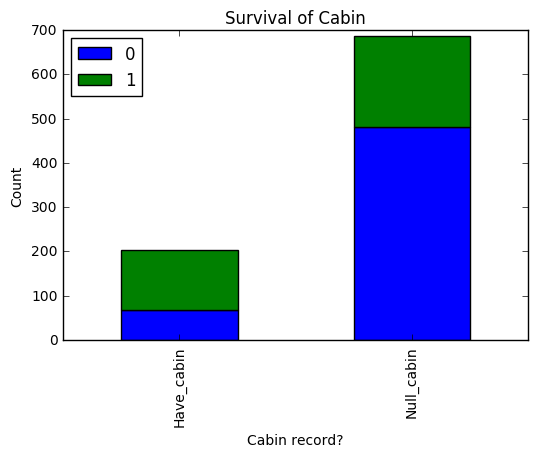

In [30]:
# plot 
fig = plt.figure(figsize=(12,10))
fig.set(alpha= 0.2)

draw.plot(kind='bar',stacked = True)
plt.title('Survival of Cabin')
plt.xlabel('Cabin record?')
plt.ylabel('Count')

plt.savefig("Survival of Cabin.png")

In [31]:
deal_data['Cabin'].isnull().sum()

687

In [32]:
# so from above picture, the null value of cabin influence the Survival of people
# So need to replace the missing values of Cabin with U( U for unknown)
deal_data['Cabin'] = deal_data['Cabin'].fillna('U')
deal_data.head()

E:\Anaconda3\envs\NEUPython\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,PassengerId,Survived,Pclass,Cabin
0,1,0,3,U
1,2,1,1,C85
2,3,1,3,U
3,4,1,1,C123
4,5,0,3,U


In [33]:
deal_data['Cabin'].isnull().sum()

0

In [34]:
# To map each Cabin value with the first letter of cabin
deal_data['Cabin'] = deal_data['Cabin'].map(lambda x :  'Cabin_'+ x[0])
deal_data.head()

E:\Anaconda3\envs\NEUPython\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,PassengerId,Survived,Pclass,Cabin
0,1,0,3,Cabin_U
1,2,1,1,Cabin_C
2,3,1,3,Cabin_U
3,4,1,1,Cabin_C
4,5,0,3,Cabin_U


In [39]:
pd.crosstab(deal_data.Cabin,deal_data.Survived,margins =True)

Survived,0,1,All
Cabin,,,
Cabin_A,8,7,15
Cabin_B,12,35,47
Cabin_C,24,35,59
Cabin_D,8,25,33
Cabin_E,8,24,32
Cabin_F,5,8,13
Cabin_G,2,2,4
Cabin_T,1,0,1
Cabin_U,481,206,687


In [59]:
final_draw = pd.crosstab(deal_data.Cabin,deal_data.Survived,margins =True).apply(lambda x : x/float(x[-1]),axis = 1)
final_draw

Survived,0,1,All
Cabin,,,
Cabin_A,0.533333,0.466667,1.0
Cabin_B,0.255319,0.744681,1.0
Cabin_C,0.406780,0.593220,1.0
Cabin_D,0.242424,0.757576,1.0
Cabin_E,0.250000,0.750000,1.0
Cabin_F,0.384615,0.615385,1.0
Cabin_G,0.500000,0.500000,1.0
Cabin_T,1.000000,0.000000,1.0
Cabin_U,0.700146,0.299854,1.0


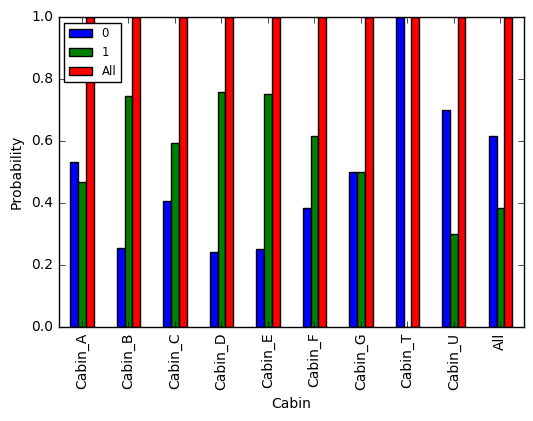

In [88]:
fig = plt.figure(figsize=(12,12))
fig.set(alpha= 0.2)

final_draw.plot(kind='bar')

plt.ylabel('Probability')
plt.legend(loc = 'upper left',fontsize='small')
plt.savefig("final_Cabin_comparison.png")